<a href="https://colab.research.google.com/github/azizajamjoom/CA01_EDA_House_Price_Perdiction/blob/main/CA01_EDA_House_Price_Perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [10]:
# Import pandas for working with datasets (tables)
import pandas as pd

# Import numpy for numerical operations (math, arrays)
import numpy as np

# Import matplotlib for creating graphs
import matplotlib.pyplot as plt

# Import seaborn for easier and nicer visualizations
import seaborn as sns

In [11]:
# Link to the training dataset on GitHub
train_url = "https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(train_url)

# Show the first 5 rows to understand the data structure
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset has 1,460 houses and 81 features, with SalePrice as the target variable. Several columns (Alley, PoolQC, Fence, MiscFeature) have many missing values, showing data quality issues. Most homes are in the RL zoning category. The data includes both numerical and categorical variables, so cleaning and encoding are needed before modeling.

In [12]:
# Generate summary statistics for all numerical and categorical variables
# This helps understand data distribution, common values, and detect potential issues like outliers
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains missing values in several features, wide numerical ranges indicating potential outliers, and dominant categorical classes, highlighting the need for data cleaning before modeling

In [13]:
# Calculate the proportion of missing values in each column
# This helps identify which features have the most data quality issues
# and guides decisions on whether to fill or drop them

df.isnull().mean().sort_values(ascending=False)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


Several variables such as PoolQC, MiscFeature, and Alley have extremely high missing values, indicating poor data quality for these features. These columns may need to be removed or carefully handled during preprocessing.

In [21]:
# Get numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

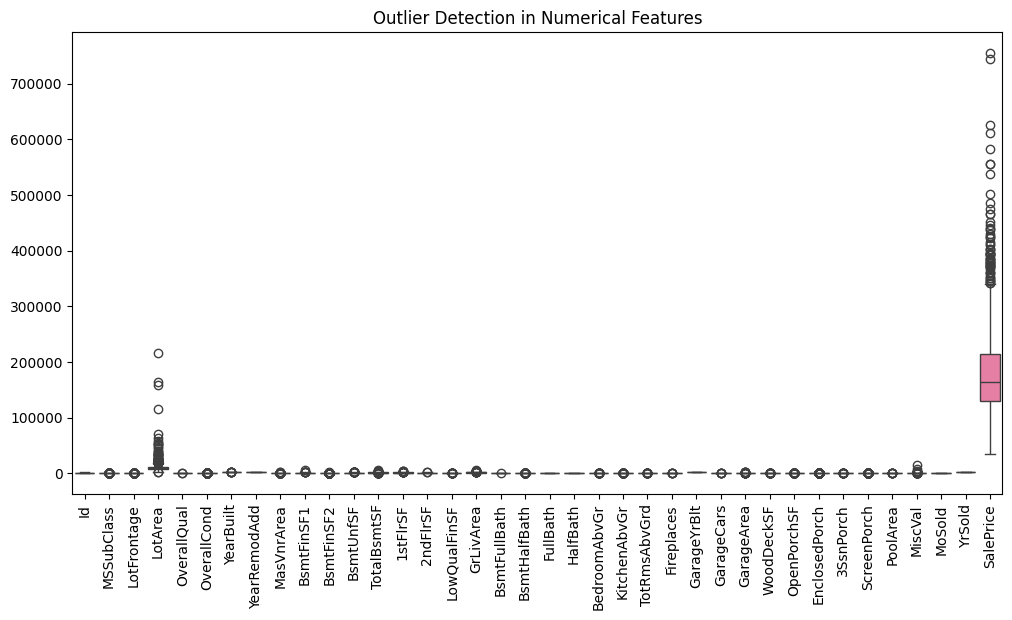

In [22]:
# Visualize outliers in numerical features using boxplots

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection in Numerical Features")
plt.show()

Several numerical variables, including LotArea and SalePrice, show strong right-skewness with extreme high-value points appearing as outliers in the boxplots. However, these values likely represent legitimately larger or higher-priced houses rather than data errors. This suggests the presence of natural variability in housing characteristics rather than incorrect entries, though these skewed distributions may require transformation or robust modeling techniques later.

Distribution of key variables (histograms)

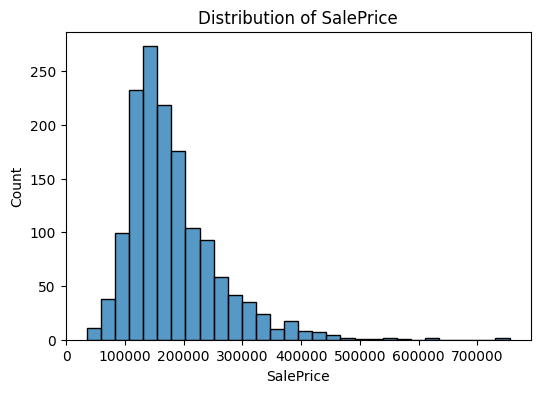

In [28]:
# Visualize distribution of SalePrice
plt.figure(figsize=(6,4))
sns.histplot(df["SalePrice"], bins=30)
plt.title("Distribution of SalePrice")
plt.show()

SalePrice is right-skewed, with most homes clustered in the lower to mid price range and a small number of very high-priced properties creating a long tail.

Relationship with target

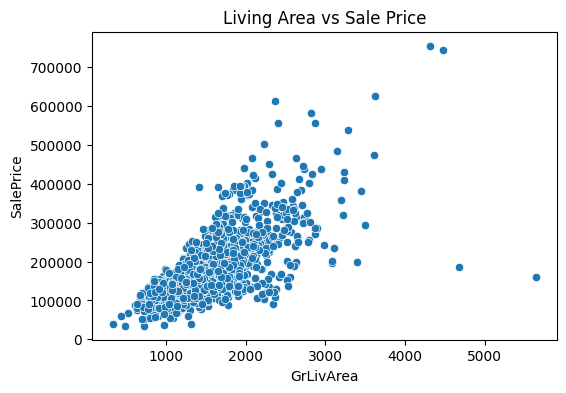

In [30]:
# Relationship between living area and sale price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.show()

There is a strong positive relationship between living area and sale price, with larger homes generally selling for higher prices, along with a few high-value outliers.

Overall Quality vs Sale Price

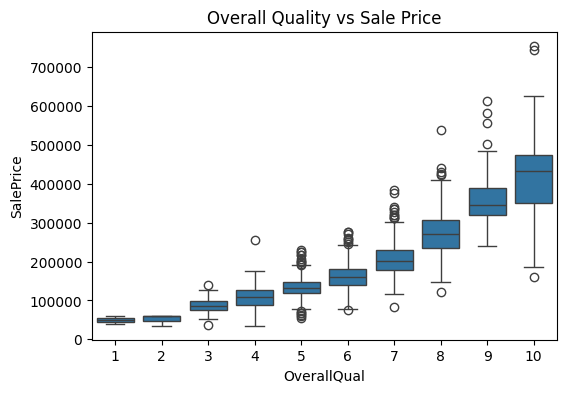

In [32]:
# Relationship between house quality and sale price
plt.figure(figsize=(6,4))
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("Overall Quality vs Sale Price")
plt.show()

Homes with higher overall quality consistently sell for higher prices, with both the median sale price and price range increasing as quality improves. This indicates a strong positive relationship between construction quality and home value.

Living Area Distribution

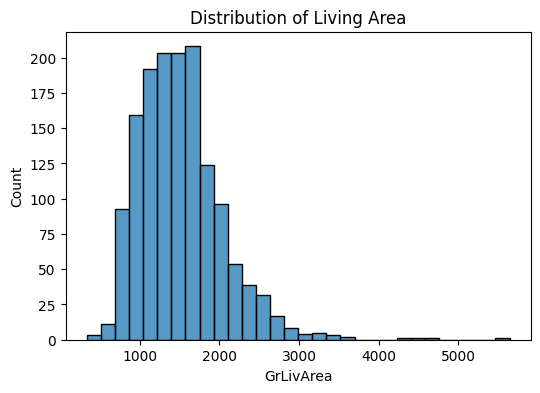

In [33]:
# Distribution of living area
plt.figure(figsize=(6,4))
sns.histplot(df["GrLivArea"], bins=30)
plt.title("Distribution of Living Area")
plt.show()

Living area is right-skewed, with most homes clustered around smaller to mid-sized square footage and a few very large houses creating a long tail.

YData Report

In [35]:
# install
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00


In [36]:
# import ProfileReport
from ydata_profiling import ProfileReport

In [37]:
# create the report
profile = ProfileReport(df, title="Housing Data Report", explorative=True)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 81/81 [00:02<00:00, 34.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre-Processing

In [17]:
# To see the results
print(num_cols)
print(cat_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [18]:
# Check missing values in numerical columns only
# This helps identify which numeric features need imputation

df[num_cols].isnull().sum()


# Check missing values in categorical columns only
# This helps identify which categorical features need imputation

df[cat_cols].isnull().sum()

,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


The dataset contains significant missing values in features related to pools, alleys, fences, masonry type, basement, and garage characteristics. Some variables have missing values for most homes, while many core property features are fully complete. This indicates data quality issues that must be addressed in preprocessing.


In [24]:
# Fill missing categorical values with "None" to represent features that do not exist
# Replace missing categorical values with "None" to indicate absence of the feature
cat_missing = [
    "Alley", "PoolQC", "Fence", "MiscFeature",
    "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2",
    "MasVnrType"
]

df[cat_missing] = df[cat_missing].fillna("None")

In [25]:
# Fill missing numerical values using the median (or zero where appropriate)
# Impute missing numerical values to handle skew and preserve data
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

# Post-Processing (Collinearity)

In [27]:
# Check correlations between numerical variables to identify collinearity
# Compute correlation matrix for numerical features only
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()

corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Some numerical features are strongly correlated, suggesting possible collinearity that may affect modeling.


In [38]:
# shows which variables are most related to the target
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)

corr_with_target

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [39]:
# create a small table of strong correlations (e.g. > 0.5)
strong_corr = corr_with_target[abs(corr_with_target) > 0.5]

strong_corr_df = strong_corr.reset_index()
strong_corr_df.columns = ["Feature", "Correlation_with_SalePrice"]

strong_corr_df

,Feature,Correlation_with_SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


Based on correlation analysis, several variables show minimal relationship with SalePrice and were recommended for removal, including Id, MiscVal, YrSold, OverallCond, and KitchenAbvGr. Additionally, highly correlated features such as GarageArea and 1stFlrSF were dropped in favor of stronger predictors (GarageCars and TotalBsmtSF) to reduce multicollinearity and improve model stability.